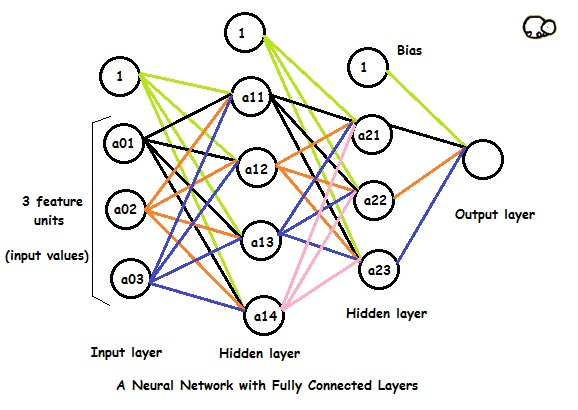

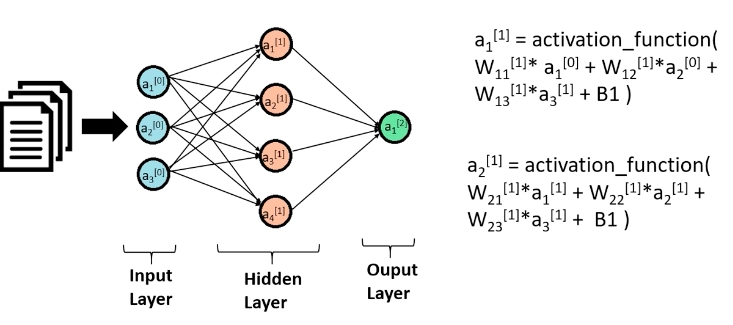

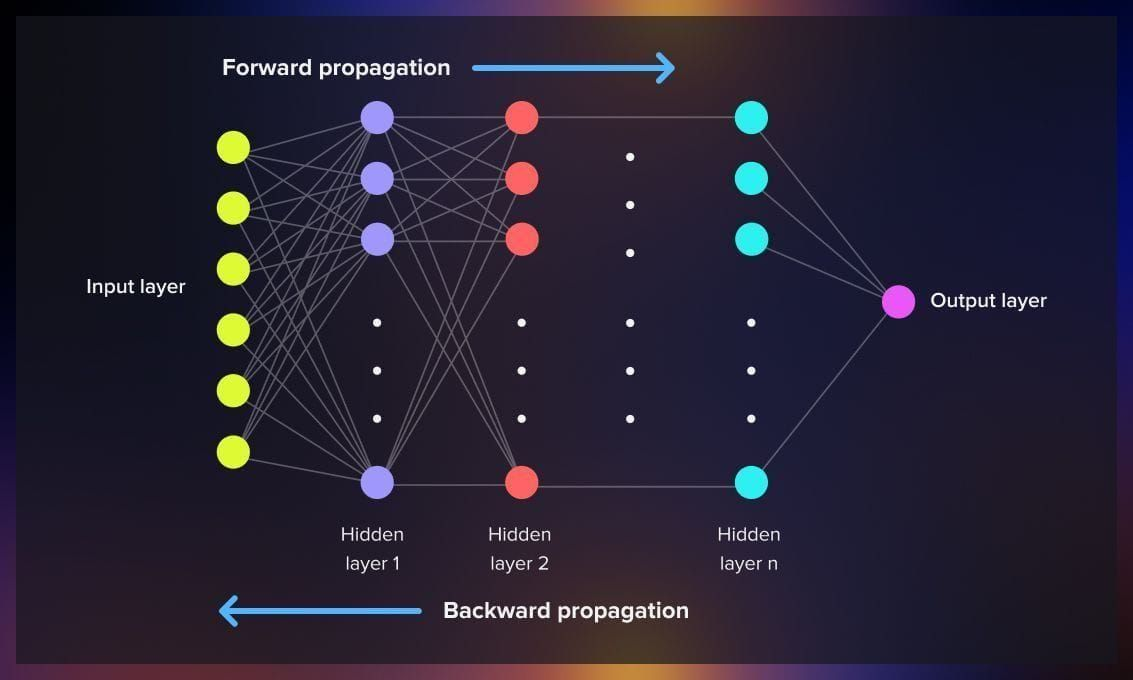

# ANN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Artificial_Neural_Network_Case_Study_data.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
## Taking all rows and all columns in data except that last one
## But as per observations customer_ids and surname not important so we should drop it
X = df.iloc[:, 3:-1].values
print("Independent Variables are :", X)

Independent Variables are : [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
y = df.iloc[:, -1].values
print("Dependent Variables are :", y)

Dependent Variables are : [1 0 1 ... 1 1 0]


In [ ]:
## Transforming the gender variable, labels are chosen randomely
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
## Transforming the geography column variable, lables are chosen randomely
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
## [[619 'France' 'Female' ...]
## [608 'Spain' 'Female' ...]
## [502 'France' 'Female' ...]
## [709 'France' 'Female' ...]
## [772 'Germany' 'Male' ...]
## [792 'France' 'Female' ...]]

In [ ]:
##[[619 1 0 0 ...]
## [608 0 1 0 ...]
## [502 1 0 0 ...]
## [709 1 0 0 ...]
## [772 0 0 1 ...]
## [792 1 0 0 ...]]


In [ ]:
df_1 = pd.DataFrame({
    'Age': [25, 30, 22, 35, 40],
    'Gender': ['Female', 'Male', 'Female', 'Female', 'Male'],
    'Country': ['France', 'Spain', 'France', 'Germany', 'France']
})

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [ ]:
df_1['Gender'] = le.fit_transform(df_1['Gender'])
print(df_1)

   Age  Gender  Country
0   25       0   France
1   30       1    Spain
2   22       0   France
3   35       0  Germany
4   40       1   France


In [ ]:
constant_v1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Country'])], remainder='passthrough')
df_1 = np.array(constant_v1.fit_transform(df_1))
print(df_1)


[[ 1.  0.  0. 25.  0.]
 [ 0.  0.  1. 30.  1.]
 [ 1.  0.  0. 22.  0.]
 [ 0.  1.  0. 35.  0.]
 [ 1.  0.  0. 40.  1.]]


In [ ]:
## Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(8000, 12) (2000, 12)
(8000,) (2000,)


In [ ]:
## Data scaling? Normalizing of the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
## Builiding The Model
ann = tf.keras.models.Sequential()

In [ ]:
## Adding 'fully connected ' Input Layers to the sequential model
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
## Adding "Fully connected " Hidden layer to the model
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

In [ ]:
## Adding "fully connected" output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
## Training Model
## Compile the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5219 - loss: 0.7438
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.5138
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.4587
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7929 - loss: 0.4595
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8087 - loss: 0.4356
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8109 - loss: 0.4343
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8273 - loss: 0.4179
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.3951
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8306 - loss: 0.3956
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3843
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.3724
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [ ]:
y_pred_prob = ann.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
## probabilities to binary
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)
result = np.concatenate((y_pred, y_test), axis=1)
print(result)

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 800, 1, 40, 3, 80000, 2, 1, 1, 500000]])))
print(ann.predict(sc.transform([[1, 0, 0, 800, 1, 40, 3, 80000, 2, 1, 1, 500000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.01114066]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[False]]


In [ ]:
cf = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cl = classification_report(y_test, y_pred)
print(cf)
print(acc)
print(cl)

[[1491  104]
 [ 180  225]]
0.858
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.68      0.56      0.61       405

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000

